In [1]:
%matplotlib inline

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Competitive Lotka-Volterra systems

The generalised Lotka-Volterra equations for a system of $N$ species competing for finite resources are
given by

$$
\frac{dx_i}{dt}=r_ix_i\left(1-\sum_{j=1}^Na_{ij}x_j\right)\quad\mathrm{with}\quad r_i>0\quad\mathrm{and}\quad a_{ij}\ge 0.
$$



We consider a system of $N=4$ interacting species. We chose the following parameters:
$$
r_i=\left(\begin{array}{c}1\\0.72\\1.53\\1.27\end{array}\right),\qquad
a_{ij}=
    \left(
        \begin{array}{cccc}
            1    & 1.09 & 1.52 & 0    \\
            0    & 1    & 0.44 & 1.36 \\
            2.33 & 0    & 1    & 0.47 \\
            1.21 & 0.51 & 0.35 & 1
        \end{array}
     \right)
$$

#### Task 1

Inverting a matrix works with the function `np.linalg.inv()` and matrix multiplication is done with `np.matmul()` (Check the docs if necessary). The latter multiplies matrices, but also matrices with vectors.

The steady state, in which all species coexist, is given by
$$
    \bar{x}=A^{-1}\cdot\left(\begin{array}{c}1\\1\\1\\1\end{array}\right).
$$
Use the above functions to calculate the steady state.

Check: you should get
$$
\bar{x}\approx\left(\begin{array}{c}0.3013\\0.4586\\0.1307\\0.3557\end{array}\right)
$$

#### Solution


In [ ]:
#define variables
xi = sp.symbols('x_i')
ri = sp.symbols('r_i',positive = True)
xj = sp.symbols("x_j", positive = True)
N = sp.symbols("N")
j = sp.symbols("j")
xj = sp.symbols("x_j")

#define matrices
ri = np.array([[1], [0.72], [1.53], [1.27]])
a_ij = np.array([[1, 1.09, 1.52,0],
                 [0, 1, 0.44,1.36],
                 [2.33, 0, 1,0.47],
                 [1.21,0.51,0.35,1]])
#define the equation
dx_idt = ri * xi * (1 - sum())

In [ ]:
#define the interaction matrix (a_ij)
a_ij = np.array([[1, 1.09, 1.52,0],
                 [0, 1, 0.44,1.36],
                 [2.33, 0, 1,0.47],
                 [1.21,0.51,0.35,1]])

#define the vector of ones
ones = np.ones(4)

#Inverse of a_ij
a_ij_INV = np.linalg.inv(a_ij)

steadystate = np.matmul(a_ij_INV, ones)
#result
print("Steady state x~:",steadystate)

Steady state x~: [0.301303   0.4586546  0.13076546 0.35574162]


#### Task 2

Integrate the system for time 0..600 (use a sufficient amount of time steps) and plot the result over time. Then, plot the trajectory in the phase space spanned by the first three variables.

For the 3d plot, you will need the following commands, after performing the simulation and assuming your result is stored in `sol`:
```python
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(sol[:,0],sol[:,1],sol[:,2])
ax.view_init(elev=10, azim=55)
```
The last command `ax.view_init()` is optional. It sets the position of the viewer of the 3d plot. Play around with the parameters and observe what changes.

Describe your observation.

What happens if you increase the integration time?

#### Solution

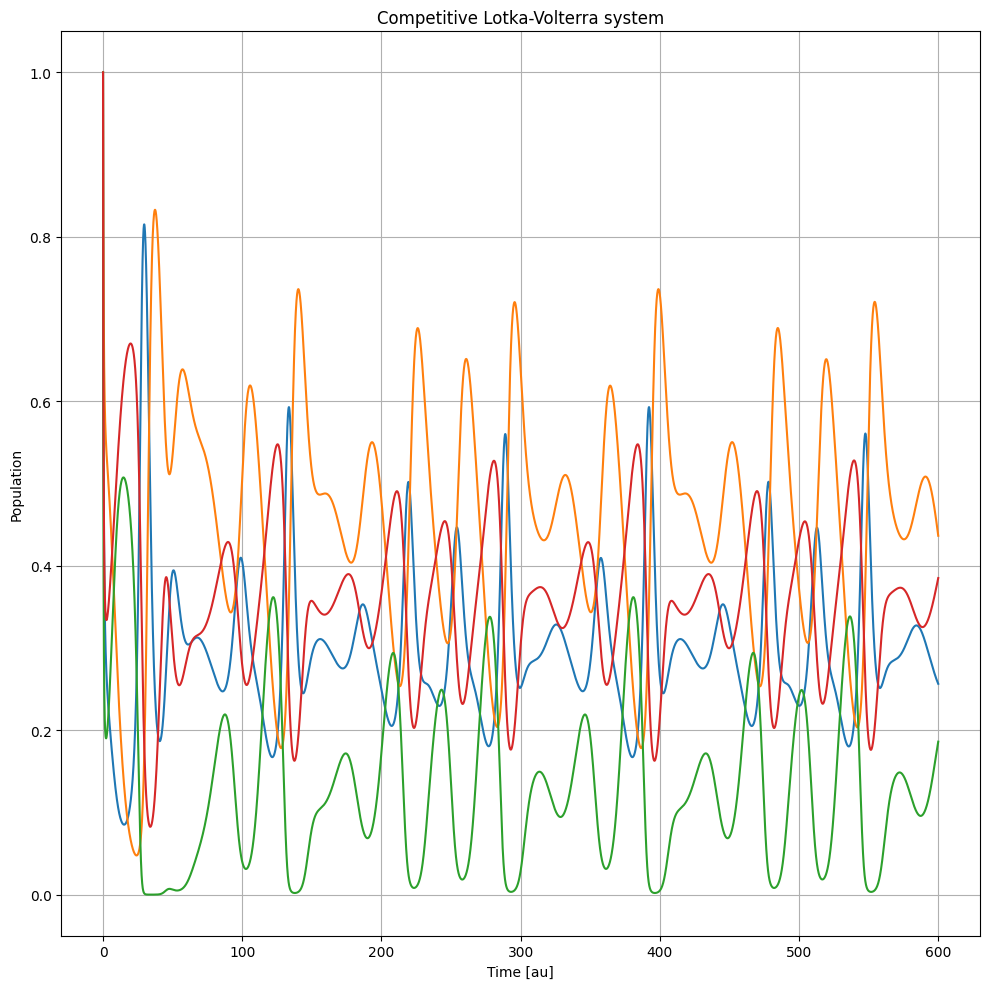

In [ ]:
#define parameters
t = np.linspace(0,600,60000) #time

x0 = np.array([1,1,1,1]) #current pop size (initial condition)

ri = np.array([[1], [0.72], [1.53], [1.27]]) #growth rate parameters per species
r = np.array([1, 0.72, 1.53, 1.27]) #works with this array

a_ij = np.array([[1, 1.09, 1.52,0],
                 [0, 1, 0.44,1.36],
                 [2.33, 0, 1,0.47],
                 [1.21,0.51,0.35,1]]) #interaction matrix N x N (represents effect of species j on species i)

#define equation
def lotka_volterra_comp(xi, t, r, a_ij): #has to be in (x, t, r, a) order 
    sum_term = a_ij @ xi #calculates sum_(j=1)^N a_{ij} * x_j for each i
    dxdt = r * xi * (1- sum_term) #calculates the growth term r_i * x_i * (1-sum_term) for each i
    return dxdt 

#Solve the ODE
solution = odeint(lotka_volterra_comp, x0, t, args= (r, a_ij)) #function signature for odeint is (func, y0, t, args=...)

#test
def glv_system(xi, t, r, a_ij):
    dxdt = r * xi * (1 - np.matmul(a_ij, xi))
    return dxdt

sol = odeint (glv_system, x0, t, args = (r, a_ij))

#-------Plot------------# 

fig = plt.figure(figsize=(10,10))
for i in range(4):
    plt.plot(t,solution[:,i], label = f'Species {i+1}') #f = formatted string -> dynamically creates labels Species 1 +++
plt.xlabel("Time [au]")
plt.ylabel("Population")
plt.title("Competitive Lotka-Volterra system")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#3D


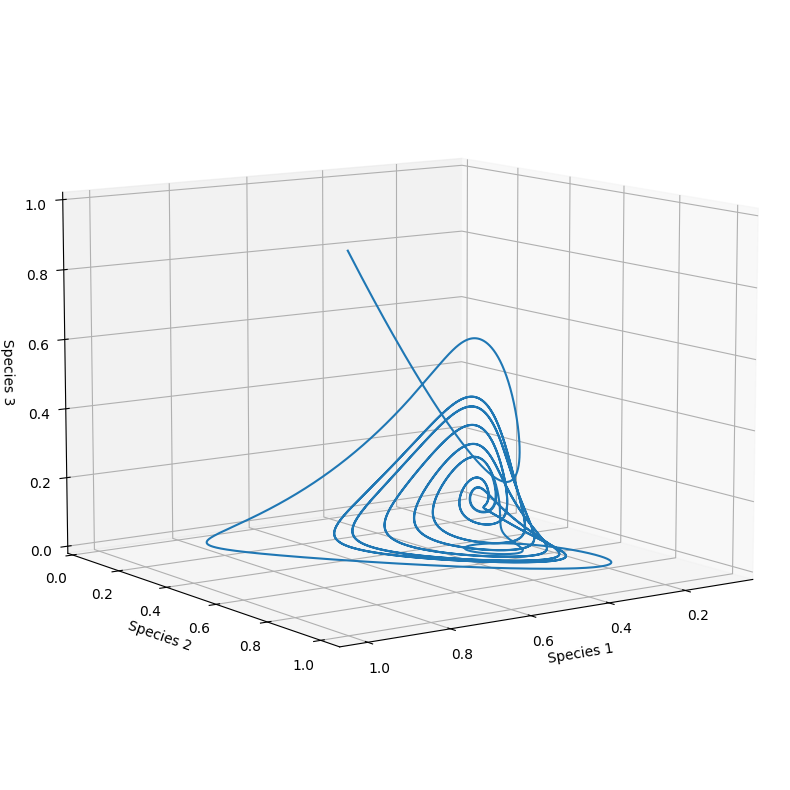

In [51]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(sol[:,0],sol[:,1],sol[:,2])
ax.set_xlabel("Species 1")
ax.set_ylabel("Species 2")
ax.set_zlabel("Species 3")
ax.view_init(elev=10, azim=55)
plt.show()


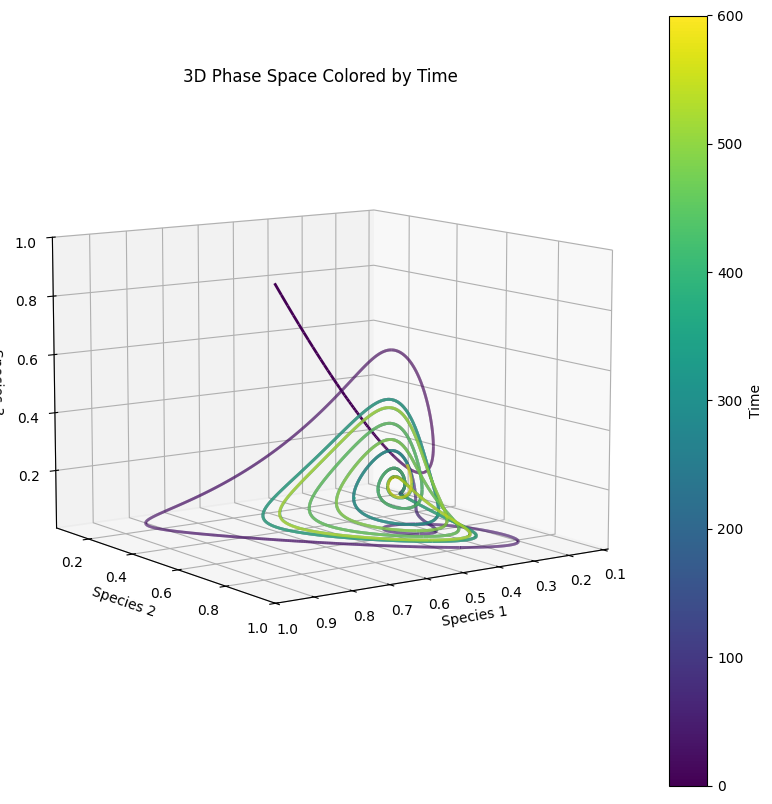

In [ ]:
#---------to colour by time------------

#extract trajectory for each species as solution is a matrix with one row per time step and one column per species
x = solution[:,0]
y = solution[:,1]
z = solution[:,2]

#create segments for color mapping
points = np.array([x,y,z]).T.reshape(-1,1,3) # 3D array where each entry is a 3D point [xi, yi, zi], shape = (N,1,3) (N= time steps)
segments = np.concatenate([points[:-1],points[1:]], axis = 1) #slice array = [:-1] -> all points except the last one, [1:] = all points except the first one -> pairing point 0 with 1, 1 with 2 ...
#concatenate joins two arrays side by side -> each row of segments is defined by [[x_i, y_i, z_i], [x_{i+1}, y_{i+1}, z_{i+1}]]
#variable segments is a list of connected pairs of points (will be individually colored according to its position in time)
#create a colormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib.colors import Normalize

norm = Normalize(t.min(),t.max()) #sets colore scale to match the time range (0 to 600)
lc = Line3DCollection(segments, cmap ="viridis", norm = norm) #draws small line segments
lc.set_array(t) # color by time
lc.set_linewidth(2)

fig = plt.figure(figsize=(10, 10)) #create a canvas size 10,10
ax = fig.add_subplot(111, projection='3d') #add 3D axis
ax.add_collection(lc) #add colored line segments to the plot

# Set limits (makes sure plot fully shows whole range of values for each species)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(z.min(), z.max())

# Labels and view
ax.set_xlabel('Species 1')
ax.set_ylabel('Species 2')
ax.set_zlabel('Species 3')
ax.set_title('3D Phase Space Colored by Time')
ax.view_init(elev=10, azim=55)

# Add colorbar
fig.colorbar(lc, ax=ax, label='Time')
plt.show()



#### Task 3

Now we introduce a parameter $s$, which indicates the interaction strength. The matrices $A_s$ are defined from the matrix $A=(a_{ij})$ above by multiplying the off-diagonal elements with $s$, i.e
$$
A_s=
    \left(
        \begin{array}{cccc}
            1    & 1.09\cdot s & 1.52\cdot s & 0    \\
            0    & 1    & 0.44\cdot s & 1.36\cdot s \\
            2.33\cdot s & 0    & 1    & 0.47\cdot s \\
            1.21\cdot s & 0.51\cdot s & 0.35\cdot s & 1
        \end{array}
     \right)
$$

What happens for $s=0$?

Explore the system's behaviour for different parameter values $0.8<s<1.1$. Good values to try include 
$s\in\left\{0.8,0.9,0.95,1,1.06,1.07,1.08\right\}$

#### Solution



[[1.   1.09 1.52 0.  ]
 [0.   1.   0.44 1.36]
 [2.33 0.   1.   0.47]
 [1.21 0.51 0.35 1.  ]]


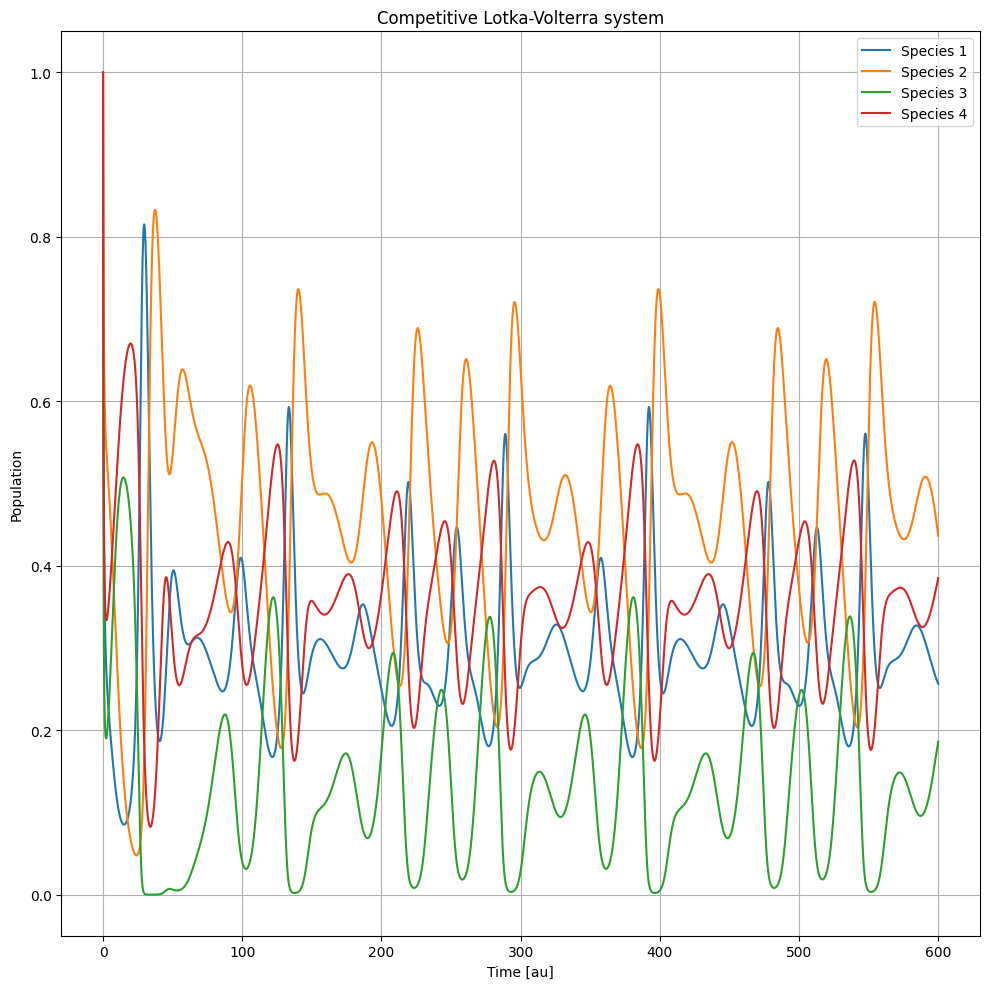

In [79]:
#multiplying off diagonals of the matrix
#define matrix
a_ij = np.array([[1, 1.09, 1.52,0],
                 [0, 1, 0.44,1.36],
                 [2.33, 0, 1,0.47],
                 [1.21,0.51,0.35,1]])
#create the mask
mask = np.ones_like(a_ij, dtype=bool) #creates a boolean matrix of same shape as a_ij filled with TRUE values
mask[np.diag_indices_from(a_ij)] =False #gets the indices of the diagonal elements and sets them to False

#apply the mask
s = 1
a_ij[mask] *= s #selects only the off-diagonal elements based on the mask, *= means that a_ij is multiplied by s and the new value is stored in a_ij
print(a_ij)

#plotting
solution = odeint(lotka_volterra_comp, x0, t, args= (r, a_ij)) #function signature for odeint is (func, y0, t, args=...)

fig = plt.figure(figsize=(10,10))
for i in range(4):
    plt.plot(t,solution[:,i], label = f'Species {i+1}') #f = formatted string -> dynamically creates labels Species 1 +++
plt.xlabel("Time [au]")
plt.ylabel("Population")
plt.title("Competitive Lotka-Volterra system")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

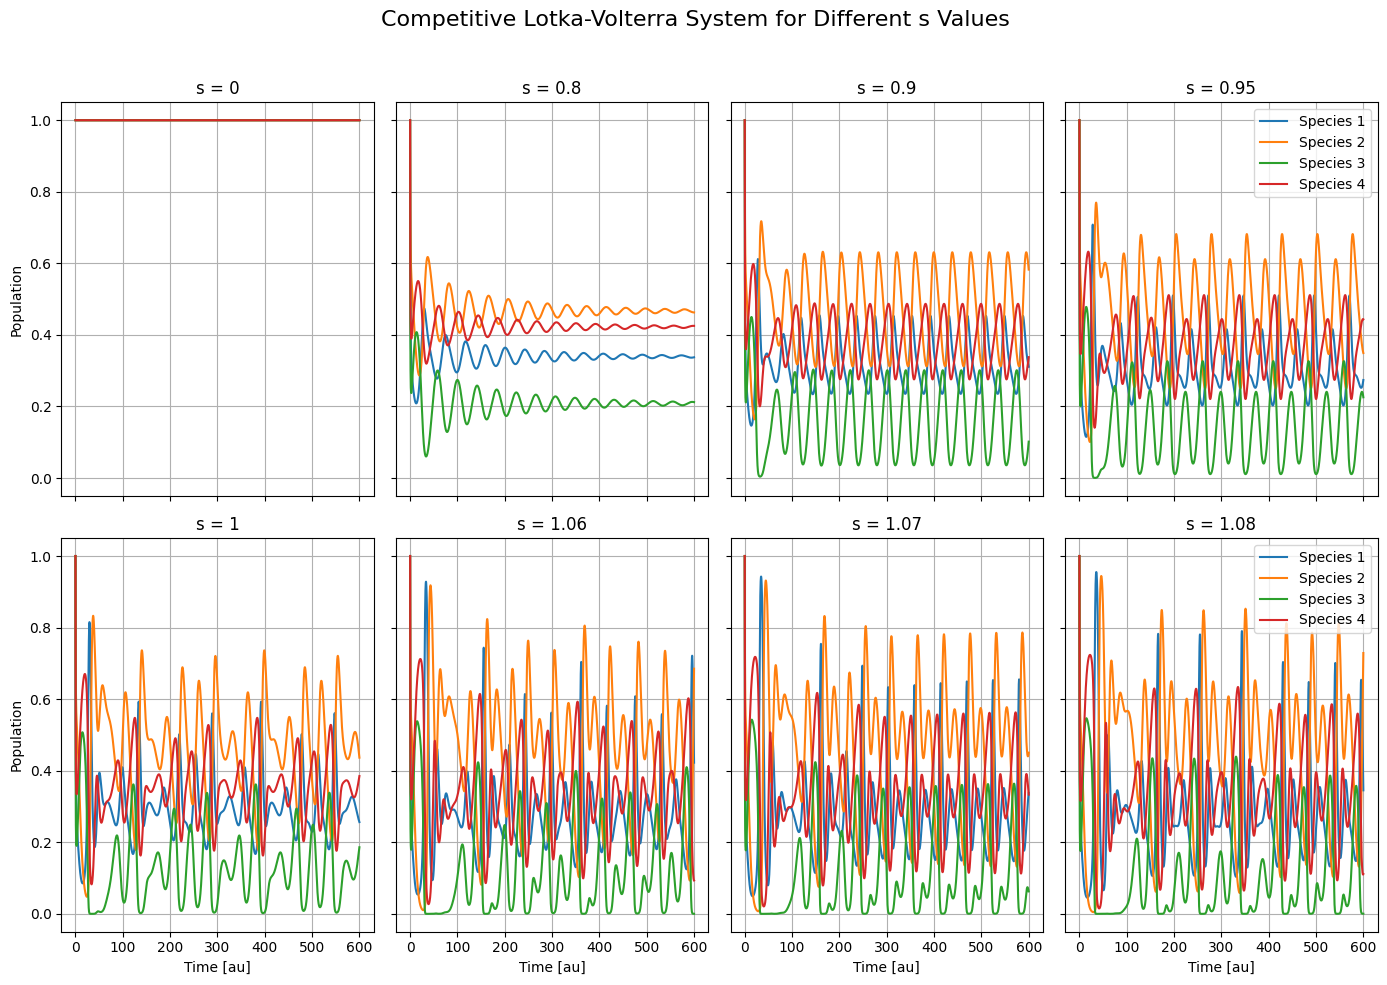

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
r = np.array([1, 0.72, 1.53, 1.27])
x0 = np.array([1, 1, 1, 1])
t = np.linspace(0, 600, 60000)

# Function for the system
def lotka_volterra_comp(xi, t, r, a_ij): #x0 is initial value of pop at t = 0, xi is current value of pop at any given time and is provided by solver (odeint)
    sum_term = a_ij @ xi
    dxdt = r * xi * (1 - sum_term)
    return dxdt

# Create subplot grid for more plots
s_values = [0, 0.8, 0.9, 0.95, 1, 1.06, 1.07, 1.08] #determining s values per plot
fig, axes = plt.subplots(2, 4, figsize=(14, 10), sharex=True, sharey=True) # 2 rows 4 coloums sharing x and y axis
axes = axes.flatten()  # flatten 2D array to make indexing easier

# Loop over s values (loop over each value in s_value list, give both the index (0,1,2,3...) and the actual value (s = 0, 0.8, 1 ...) in each step of the loop)
for idx, s in enumerate(s_values): #turns list (s_values) into pairs (0.0), (1, 0.8).. (index, value)
    # Define base interaction matrix
    a_ij = np.array([
        [1, 1.09, 1.52, 0],
        [0, 1, 0.44, 1.36],
        [2.33, 0, 1, 0.47],
        [1.21, 0.51, 0.35, 1]
    ])

    # Mask to scale off-diagonal elements
    mask = np.ones_like(a_ij, dtype=bool)
    mask[np.diag_indices_from(a_ij)] = False
    a_ij[mask] *= s  # scale off-diagonal terms

    # Solve system
    sol = odeint(lotka_volterra_comp, x0, t, args=(r, a_ij))

    # Plot on subplot
    ax = axes[idx] #to know which subplot to draw into 
    for i in range(4): # range = how many species
        ax.plot(t, sol[:, i], label=f'Species {i+1}')
    ax.set_title(f's = {s}')
    ax.grid(True)
    if idx in [4,5,6,7]: #places the x axis label to the designated plot
        ax.set_xlabel("Time [au]")
    if idx in [0, 4]: #places y axis label to the designated plot
        ax.set_ylabel("Population")

# Add legend to the last subplot 
axes[7].legend(loc='upper right')
axes[3].legend(loc='upper right')
fig.suptitle("Competitive Lotka-Volterra System for Different s Values", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Task 4

Plot the steady state values of the four species as a function of $s$. Vary $s$ for example between 0 and 1.5.

#### Solution

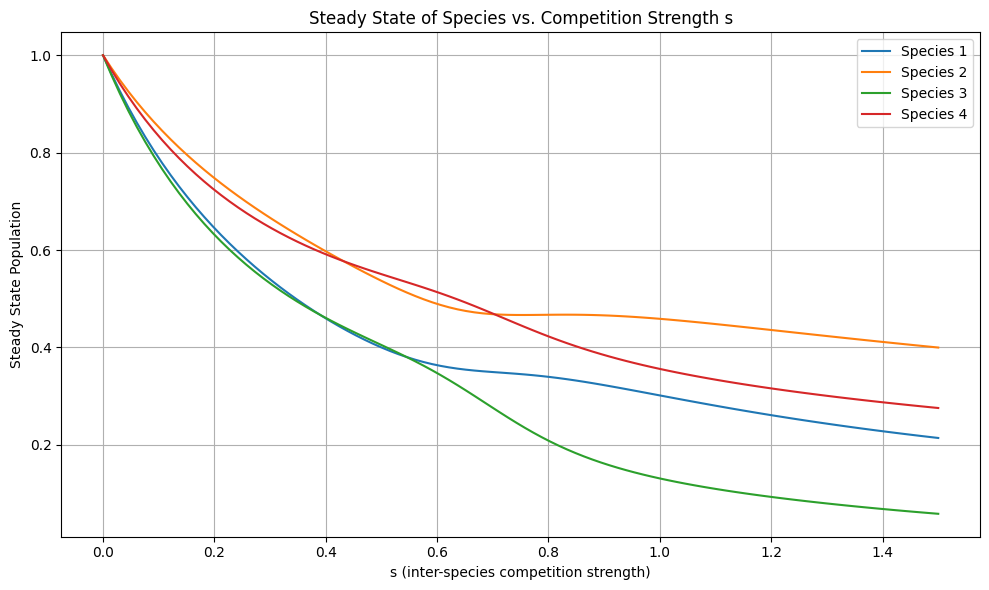

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Base interaction matrix (before scaling off-diagonal entries)
base_a_ij = np.array([
    [1,    1.09, 1.52, 0],
    [0,    1,    0.44, 1.36],
    [2.33, 0,    1,    0.47],
    [1.21, 0.51, 0.35, 1]
])

# Range of s values to try
s_values = np.linspace(0, 1.5, 100)

# Store steady states (creates empty list)
steady_states = []

for s in s_values: # going through s values 
    # Create a copy of the interaction matrix
    A = base_a_ij.copy()
    
    # Mask: select off-diagonal elements
    mask = np.ones_like(A, dtype=bool)
    np.fill_diagonal(mask, False)
    
    # Scale off-diagonal terms by s
    A[mask] *= s

    # Solve: x̄ = A⁻¹ · 1 as this is defined as the steady state
    try: #try running code, if error dont crash just move on
        x_bar = np.linalg.inv(A) @ np.ones(4) #inverse of copy of base interaction matrix * vector of ones (with 4 rows)
    except np.linalg.LinAlgError: #if this error happens do this instead (prevents crashes)
        # If A is not invertible, append NaNs (or handle it differently)
        x_bar = np.full(4, np.nan) #if error then store vector of NaNs 

    steady_states.append(x_bar) #adds x_bar to list

# Convert to NumPy array for plotting
steady_states = np.array(steady_states)  # shape: (len(s_values), 4)

# Plot
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(s_values, steady_states[:, i], label=f"Species {i+1}")

plt.xlabel("s (inter-species competition strength)")
plt.ylabel("Steady State Population")
plt.title("Steady State of Species vs. Competition Strength s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


reproduce steady state plot from Rossberg 2017 paper, with adding species and deleting them depending on pop size, time = invasion events (x axis), y axis = number of species 

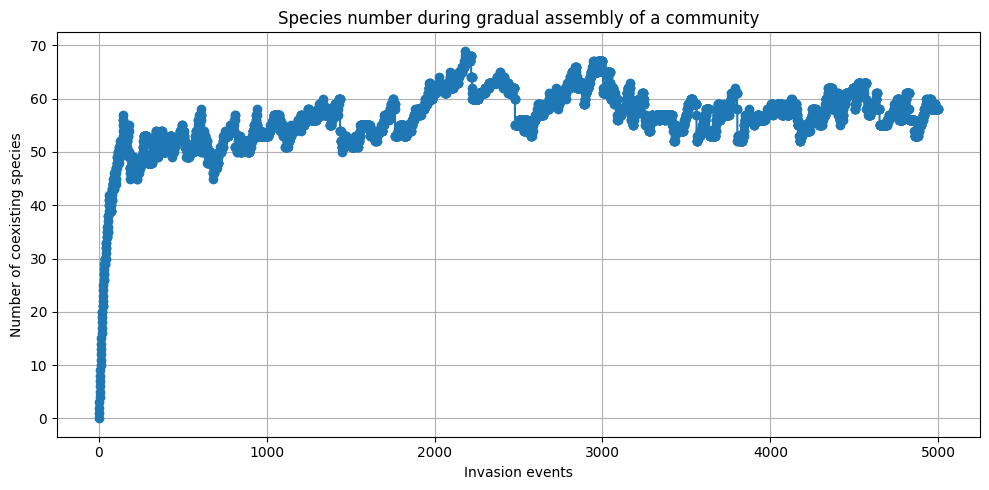

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Function to generate competition matrix when new species is added
#G_old = existing competition matrix, S = new total number of speceies 
# -> goal is to return a new S x S matrix G_new that includes interactions with newly added species
def generate_competition_matrix(G_old, S): 
    G_new = np.ones((S, S)) #creates a square matrix size of S x S filled with 1(inital of all interaction = 1)
    G_new[:-1, :-1] = G_old #selects everything except the last row/ column of the new matrix and copies existing competition values from G_old

#old interactions are preserved, The new species (row and Column S-1) still has to be filled in

    # Generate random Z and Q vectors (length S), np.random.rand(S) gives a vector of S random numbers between 0 and 1,
    # < 0.2 checks which values are less than 0.2, returns a boolean vector 
    # * 0.2 gives a vector where 20% are 0.2 and 80% are 0
    #used to randomly define strengths of competition between invader and existing species
    Z = (np.random.rand(S) < 0.2) * 0.2
    Q = (np.random.rand(S) < 0.2) * 0.2

    # New column for invader affecting existing species (species S-1)
    # fills in last column index S-1 
    # for each existing species i, use combination of Z and Q values
    for i in range(S - 1): 
        G_new[i, S - 1] = 0.75 * Z[i] + 0.25 * Q[i]

    # New row for invader (how existing species affects the invader)
    for j in range(S):
        G_new[S - 1, j] = 0.75 * Q[j] + 0.25 * Z[j]

    # Ensure Gii = 1 (intraspecific competition) 
    # ensures that every species competes equally with itself (strength = 1)
    np.fill_diagonal(G_new, 1.0)

    #returns the new matrix
    return G_new

# ODE system for the Lotka-Volterra competition model
# B is a vector of current biomasses of all species
# G is competition matrix
def lotka_volterra_competition(B, t, G):
    interaction = G @ B
    dBdt = (1 - interaction) * B
    return dBdt

# Parameters
T = 200         # Integration time for each invasion step
dt = 0.1        # Time step
t = np.arange(0, T, dt) # creates an array starting at 0 -> [0.0,0.1,0.2,0.3,0.4...]
threshold = 1e-2  # Biomass threshold for extinction event (0.01 Biomass)

# Start with empty community
S = 0
G = np.zeros((0, 0)) #creates empty competition matrix
biomass_history = [] #empty list to store biomass 
species_counts = [] #empty list to store how many species are currently alive

# Gradual assembly up to a max number of species
max_species = 120
for i in range(5000):
#while S < max_species: #loop until max number of species is reached
    S += 1 #increases species count by 1 per loop
    G = generate_competition_matrix(G, S) #G = old matrix, S = number of species -> returns a bigger updated G

    # Initial biomasses: old species keep last known values; invader starts small
    if len(biomass_history) == 0: #checks whether this is the first species
        B0 = np.zeros(S) # if yes then biomass as 0 for the first species
    else: #if there are already species in the commmunity do this
        B0 = biomass_history[-1][-1] #gets the last known biomass vector from previous loop
        B0 = np.append(B0, 1e-3)  # adds new species with small biomass 

    # Integrate
    # B0 = starting biomass
    # uses G competition matrix which was just generated per loop
    sol = odeint(lotka_volterra_competition, B0, t, args=(G,)) # results is a matrix: rows = time points, Col = species biomasses over time

    # Only keep species with biomass above threshold at end of simulation
    final_B = sol[-1] #checks for biomasses at final time point 
    keep_indices = final_B > threshold #compares each species to threshold, returns a list with True or False

    G = G[keep_indices][:, keep_indices]  # keep only surviving species by updating G with the rows and columns of keep_indices
    sol = sol[:, keep_indices] #updates the biomass time series list with only surviving species

    # Store
    biomass_history.append(sol) #saves biomass time series of the invasion step
    species_counts.append(len(final_B[keep_indices])) #stores number of species (length of final_B) and adds to species counts list 

    # Update number of surviving species
    # .shape gives size of the matrix for a 2 row, 3 col matrix -> shape = (2,3)
    # G.shape[0] -> "how many rows" 
    S = G.shape[0] # sets S equal to number of species (rows) in the competition matrix

# Convert results for plotting
all_biomass = biomass_history #copies the content of biomass_history into a new list called all_biomass
final_species_count = [len(sol[0]) for sol in all_biomass] #for each sol in all_biomass (says how many species are in that simulation step)

#all_biomass, final_species_count[:5]  # show a preview of results

#steady state of species
# Convert species_counts into an array for plotting
species_counts_array = np.array(species_counts) #just converts the list into a NumPy array

# Plot number of coexisting species (richness) vs. invasion events
plt.figure(figsize=(10, 5))
plt.plot(species_counts_array, marker='o') #marker = "o" means dots for each data point
plt.xlabel("Invasion events")
plt.ylabel("Number of coexisting species")
plt.title("Species number during gradual assembly of a community")
plt.grid(True)
plt.tight_layout() #fixes spacing so things dont overlap
plt.show()


In [12]:
np.mean(species_counts_array[1000:,])

np.float64(57.994)

In [13]:
np.std(species_counts_array[1000:,])

np.float64(3.491627700657675)

# Make a loop with values ranging from 0.02 - 0.4 for Z and Q and return mean and std and make graphs y = #species and x = P1 or P2 

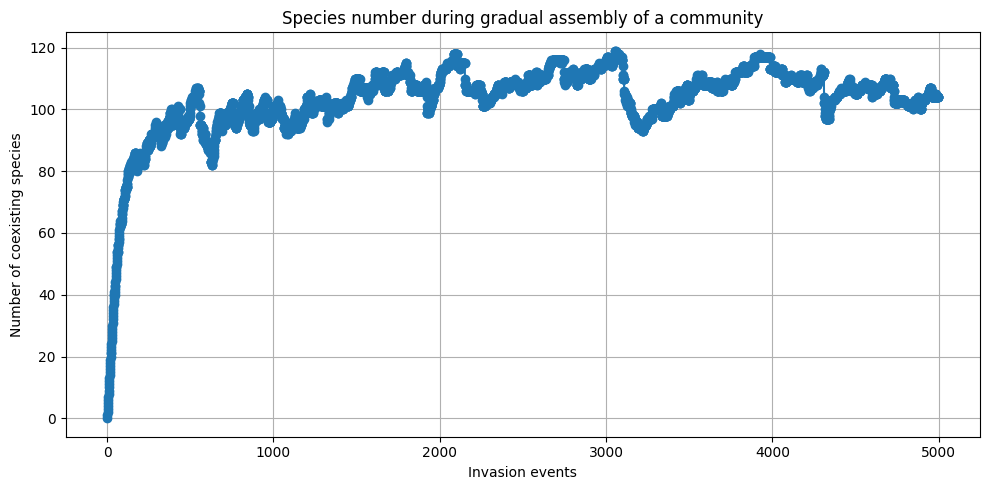

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

P1 = 0.2
P2 = 0.2
# Function to generate competition matrix when new species is added
#G_old = existing competition matrix, S = new total number of speceies 
# -> goal is to return a new S x S matrix G_new that includes interactions with newly added species
def generate_competition_matrix(G_old, S): 
    G_new = np.ones((S, S)) #creates a square matrix size of S x S filled with 1(inital of all interaction = 1)
    G_new[:-1, :-1] = G_old #selects everything except the last row/ column of the new matrix and copies existing competition values from G_old

#old interactions are preserved, The new species (row and Column S-1) still has to be filled in

    # Generate random Z and Q vectors (length S), np.random.rand(S) gives a vector of S random numbers between 0 and 1,
    # < 0.2 checks which values are less than 0.2, returns a boolean vector 
    # * 0.2 gives a vector where 20% are 0.2 and 80% are 0
    #used to randomly define strengths of competition between invader and existing species
    Z = (np.random.rand(S) < P2) * P1
    Q = (np.random.rand(S) < P2) * P1

    # New column for invader affecting existing species (species S-1)
    # fills in last column index S-1 
    # for each existing species i, use combination of Z and Q values
    for i in range(S - 1): 
        G_new[i, S - 1] = 0.75 * Z[i] + 0.25 * Q[i]

    # New row for invader (how existing species affects the invader)
    for j in range(S):
        G_new[S - 1, j] = 0.75 * Q[j] + 0.25 * Z[j]

    # Ensure Gii = 1 (intraspecific competition) 
    # ensures that every species competes equally with itself (strength = 1)
    np.fill_diagonal(G_new, 1.0)

    #returns the new matrix
    return G_new

# ODE system for the Lotka-Volterra competition model
# B is a vector of current biomasses of all species
# G is competition matrix
def lotka_volterra_competition(B, t, G):
    interaction = G @ B
    dBdt = (1 - interaction) * B
    return dBdt

# Parameters
T = 200         # Integration time for each invasion step
dt = 0.1        # Time step
t = np.arange(0, T, dt) # creates an array starting at 0 -> [0.0,0.1,0.2,0.3,0.4...]
threshold = 1e-2  # Biomass threshold for extinction event (0.01 Biomass)

# Start with empty community
S = 0
G = np.zeros((0, 0)) #creates empty competition matrix
biomass_history = [] #empty list to store biomass 
species_counts = [] #empty list to store how many species are currently alive

# Gradual assembly up to a max number of species
max_species = 120
for i in range(5000):
#while S < max_species: #loop until max number of species is reached
    S += 1 #increases species count by 1 per loop
    G = generate_competition_matrix(G, S) #G = old matrix, S = number of species -> returns a bigger updated G

    # Initial biomasses: old species keep last known values; invader starts small
    if len(biomass_history) == 0: #checks whether this is the first species
        B0 = np.zeros(S) # if yes then biomass as 0 for the first species
    else: #if there are already species in the commmunity do this
        B0 = biomass_history[-1][-1] #gets the last known biomass vector from previous loop
        B0 = np.append(B0, 1e-3)  # adds new species with small biomass 

    # Integrate
    # B0 = starting biomass
    # uses G competition matrix which was just generated per loop
    sol = odeint(lotka_volterra_competition, B0, t, args=(G,)) # results is a matrix: rows = time points, Col = species biomasses over time

    # Only keep species with biomass above threshold at end of simulation
    final_B = sol[-1] #checks for biomasses at final time point 
    keep_indices = final_B > threshold #compares each species to threshold, returns a list with True or False

    G = G[keep_indices][:, keep_indices]  # keep only surviving species by updating G with the rows and columns of keep_indices
    sol = sol[:, keep_indices] #updates the biomass time series list with only surviving species

    # Store
    biomass_history.append(sol) #saves biomass time series of the invasion step
    species_counts.append(len(final_B[keep_indices])) #stores number of species (length of final_B) and adds to species counts list 

    # Update number of surviving species
    # .shape gives size of the matrix for a 2 row, 3 col matrix -> shape = (2,3)
    # G.shape[0] -> "how many rows" 
    S = G.shape[0] # sets S equal to number of species (rows) in the competition matrix

# Convert results for plotting
all_biomass = biomass_history #copies the content of biomass_history into a new list called all_biomass
final_species_count = [len(sol[0]) for sol in all_biomass] #for each sol in all_biomass (says how many species are in that simulation step)

#all_biomass, final_species_count[:5]  # show a preview of results

#steady state of species
# Convert species_counts into an array for plotting
species_counts_array = np.array(species_counts) #just converts the list into a NumPy array

# Plot number of coexisting species (richness) vs. invasion events
plt.figure(figsize=(10, 5))
plt.plot(species_counts_array, marker='o') #marker = "o" means dots for each data point
plt.xlabel("Invasion events")
plt.ylabel("Number of coexisting species")
plt.title("Species number during gradual assembly of a community")
plt.grid(True)
plt.tight_layout() #fixes spacing so things dont overlap
plt.show()


MemoryError: 

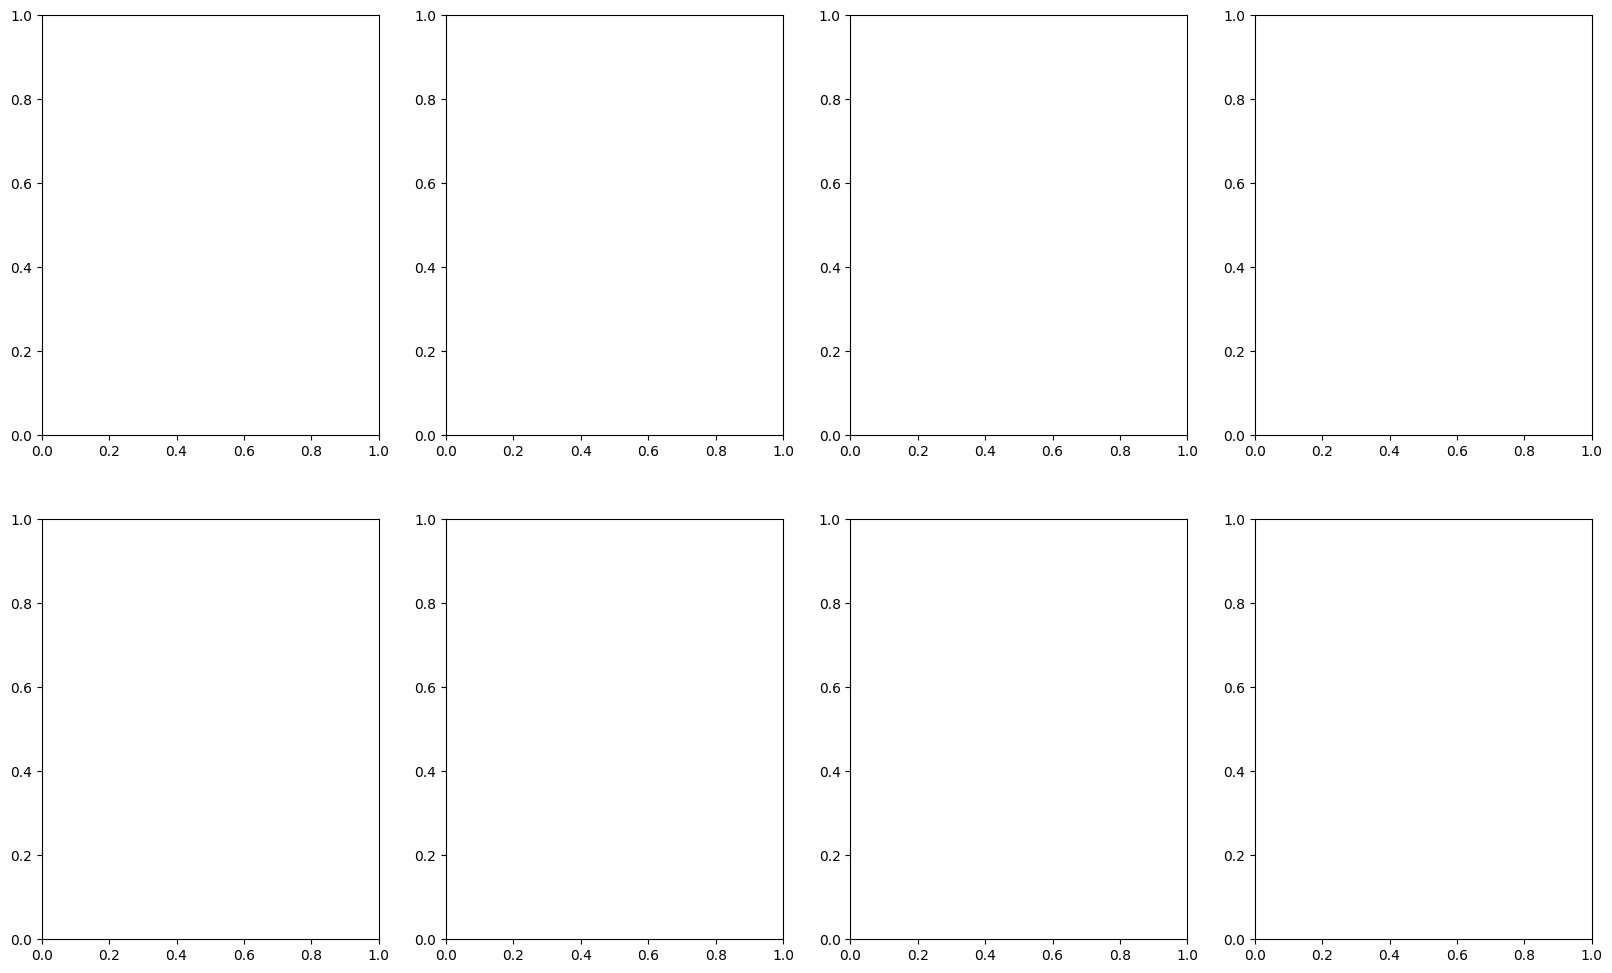

In [ ]:


# Re-import necessary libraries after state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ODE system for the Lotka-Volterra competition model
def lotka_volterra_competition(B, t, G):
    interaction = G @ B
    dBdt = (1 - interaction) * B
    return dBdt

# Function to generate competition matrix with parameters P1 and P2
def generate_competition_matrix(G_old, S, P1, P2):
    G_new = np.ones((S, S))
    G_new[:-1, :-1] = G_old
    Z = (np.random.rand(S) < P2) * P1
    Q = (np.random.rand(S) < P2) * P1
    for i in range(S - 1):
        G_new[i, S - 1] = 0.75 * Z[i] + 0.25 * Q[i]
    for j in range(S):
        G_new[S - 1, j] = 0.75 * Q[j] + 0.25 * Z[j]
    np.fill_diagonal(G_new, 1.0)
    return G_new

# Function to simulate community assembly for given P1 and P2
def simulate_assembly(P1, P2, max_species=120, threshold=1e-2, T=200, dt=0.1):
    t = np.arange(0, T, dt)
    S = 0
    G = np.zeros((0, 0))
    biomass_history = []
    species_counts = []

    while i in range(1500):
        S += 1
        G = generate_competition_matrix(G, S, P1, P2)
        if len(biomass_history) == 0:
            B0 = np.zeros(S)
            B0[-1] = 1e-3
        else:
            B0 = biomass_history[-1][-1]
            B0 = np.append(B0, 1e-3)
        sol = odeint(lotka_volterra_competition, B0, t, args=(G,))
        final_B = sol[-1]
        keep_indices = final_B > threshold
        if np.sum(keep_indices) == 0:
            break
        G = G[keep_indices][:, keep_indices]
        sol = sol[:, keep_indices]
        biomass_history.append(sol)
        species_counts.append(len(final_B[keep_indices]))
        S = G.shape[0]

    return species_counts

# Run multiple simulations for different P1 values
P1_values = np.arange(0, 0.20, 0.05)
P2 = 0.2
num_repeats = 3

mean_species = []
std_species = []

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

for i, P1 in enumerate(P1_values):
    all_counts = []
    for _ in range(num_repeats):
        counts = simulate_assembly(P1, P2)
        if counts:
            all_counts.append(counts[-1])
    mean_species.append(np.mean(all_counts))
    std_species.append(np.std(all_counts))

    axes[i].plot(all_counts, marker='o')
    axes[i].set_title(f'P1 = {P1:.2f}')
    axes[i].set_ylim(0, 120)
    axes[i].set_xlabel('Simulation')
    axes[i].set_ylabel('Final species count')

plt.tight_layout()
plt.show()

# Plot mean and std of species number vs. P1
plt.figure(figsize=(8, 6))
plt.errorbar(P1_values, mean_species, yerr=std_species, fmt='-o', capsize=5)
plt.xlabel('P1 Value')
plt.ylabel('Final Number of Coexisting Species')
plt.title('Effect of P1 on Community Richness')
plt.grid(True)
plt.tight_layout()
plt.show()


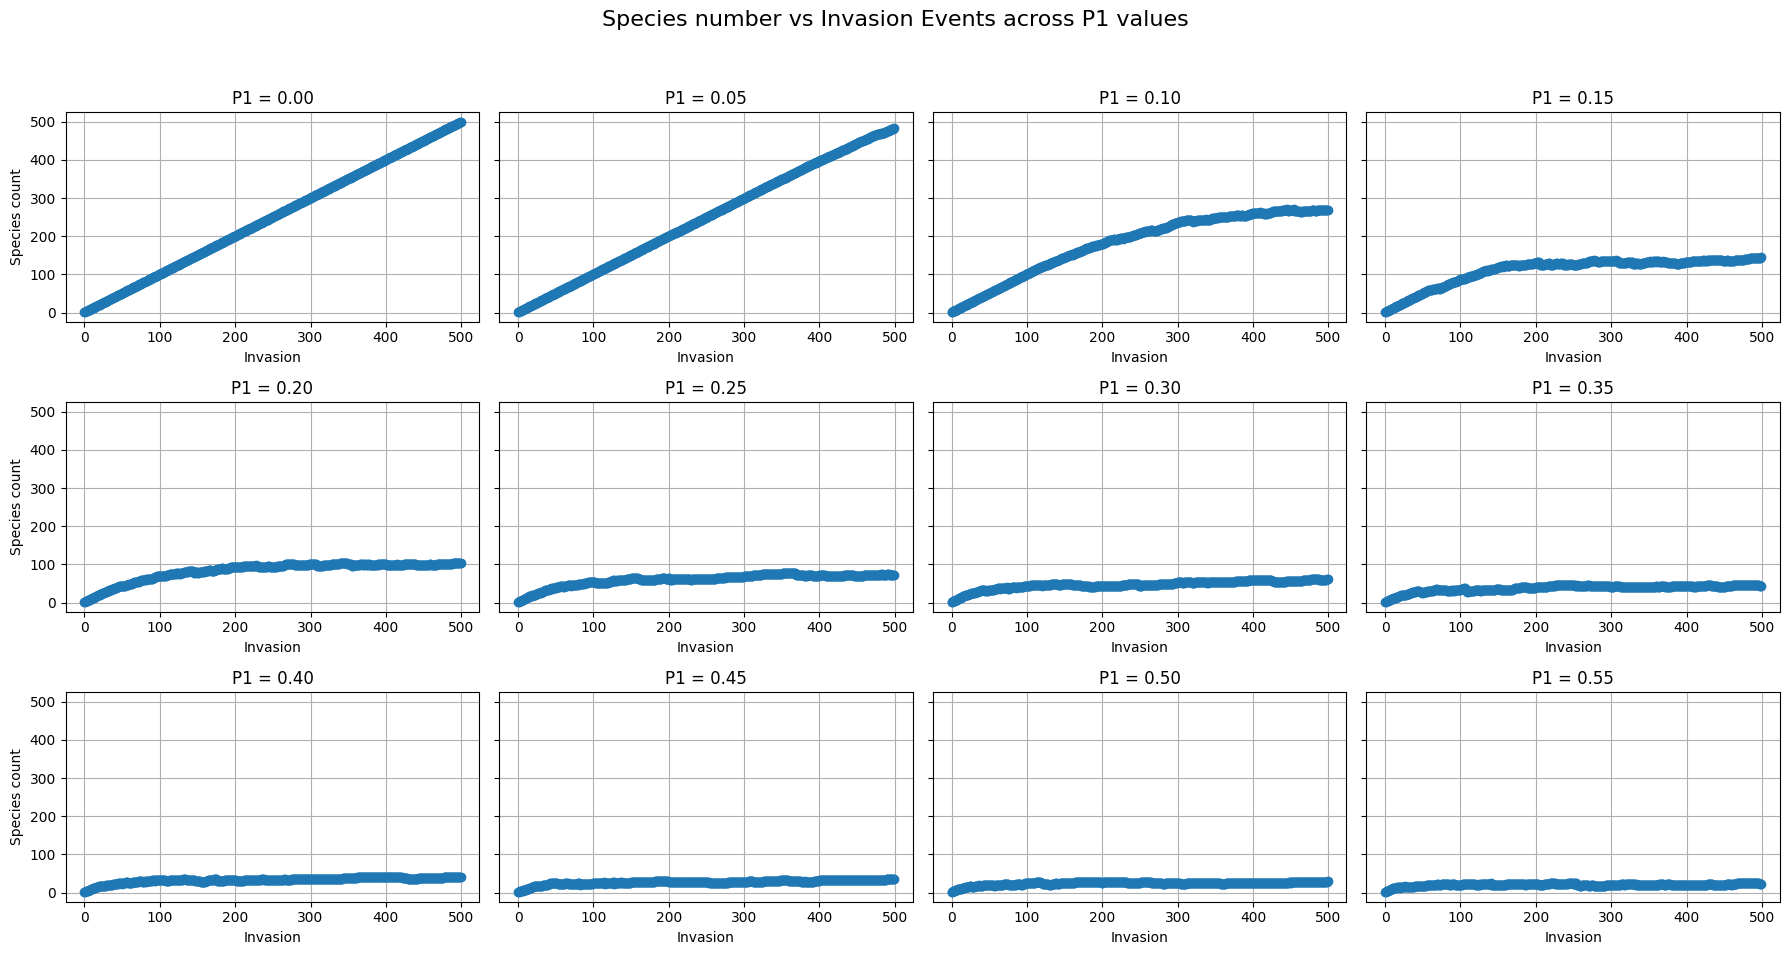

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define functions again after reset
def lotka_volterra_competition(B, t, G):
    interaction = G @ B
    dBdt = (1 - interaction) * B
    return dBdt

def generate_competition_matrix(G_old, S, P1, P2): 
    G_new = np.ones((S, S))
    G_new[:-1, :-1] = G_old
    Z = (np.random.rand(S) < P2) * P1
    Q = (np.random.rand(S) < P2) * P1
    for i in range(S - 1): 
        G_new[i, S - 1] = 0.75 * Z[i] + 0.25 * Q[i]
    for j in range(S):
        G_new[S - 1, j] = 0.75 * Q[j] + 0.25 * Z[j]
    np.fill_diagonal(G_new, 1.0)
    return G_new

# Optimized rerun with fewer P1 values and shorter simulation time
P1_values = np.arange(0, 0.6, 0.05)  # Fewer steps
P2 = 0.2
T = 1000
dt = 1.0
t = np.arange(0, T, dt)
threshold = 1e-2
max_steps = 500  # Fewer invasion events

# Set up subplots
ncols = 4
nrows = int(np.ceil(len(P1_values) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10), sharey=True)
axes = axes.flatten()

# Run simulation for each P1 value
for idx, P1 in enumerate(P1_values):
    S = 0
    G = np.zeros((0, 0))
    biomass_history = []
    species_counts = []

    for step in range(max_steps):
        S += 1
        G = generate_competition_matrix(G, S, P1, P2)

        if len(biomass_history) == 0:
            B0 = np.zeros(S)
            B0[-1] = 1e-3
        else:
            B0 = biomass_history[-1][-1]
            B0 = np.append(B0, 1e-3)

        try:
            sol = odeint(lotka_volterra_competition, B0, t, args=(G,), mxstep=5000)
        except RuntimeError:
            break

        final_B = sol[-1]
        keep_indices = final_B > threshold
        if np.sum(keep_indices) == 0:
            break

        G = G[keep_indices][:, keep_indices]
        sol = sol[:, keep_indices]
        biomass_history.append(sol)
        species_counts.append(len(final_B[keep_indices]))
        S = G.shape[0]

    species_counts_array = np.array(species_counts)
    ax = axes[idx]
    ax.plot(species_counts_array, marker='o')
    ax.set_title(f'P1 = {P1:.2f}')
    ax.set_xlabel('Invasion')
    if idx % ncols == 0:
        ax.set_ylabel('Species count')
    ax.grid(True)

# Hide unused subplots
for ax in axes[len(P1_values):]:
    ax.axis('off')

plt.suptitle("Species number vs Invasion Events across P1 values", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Changing P2

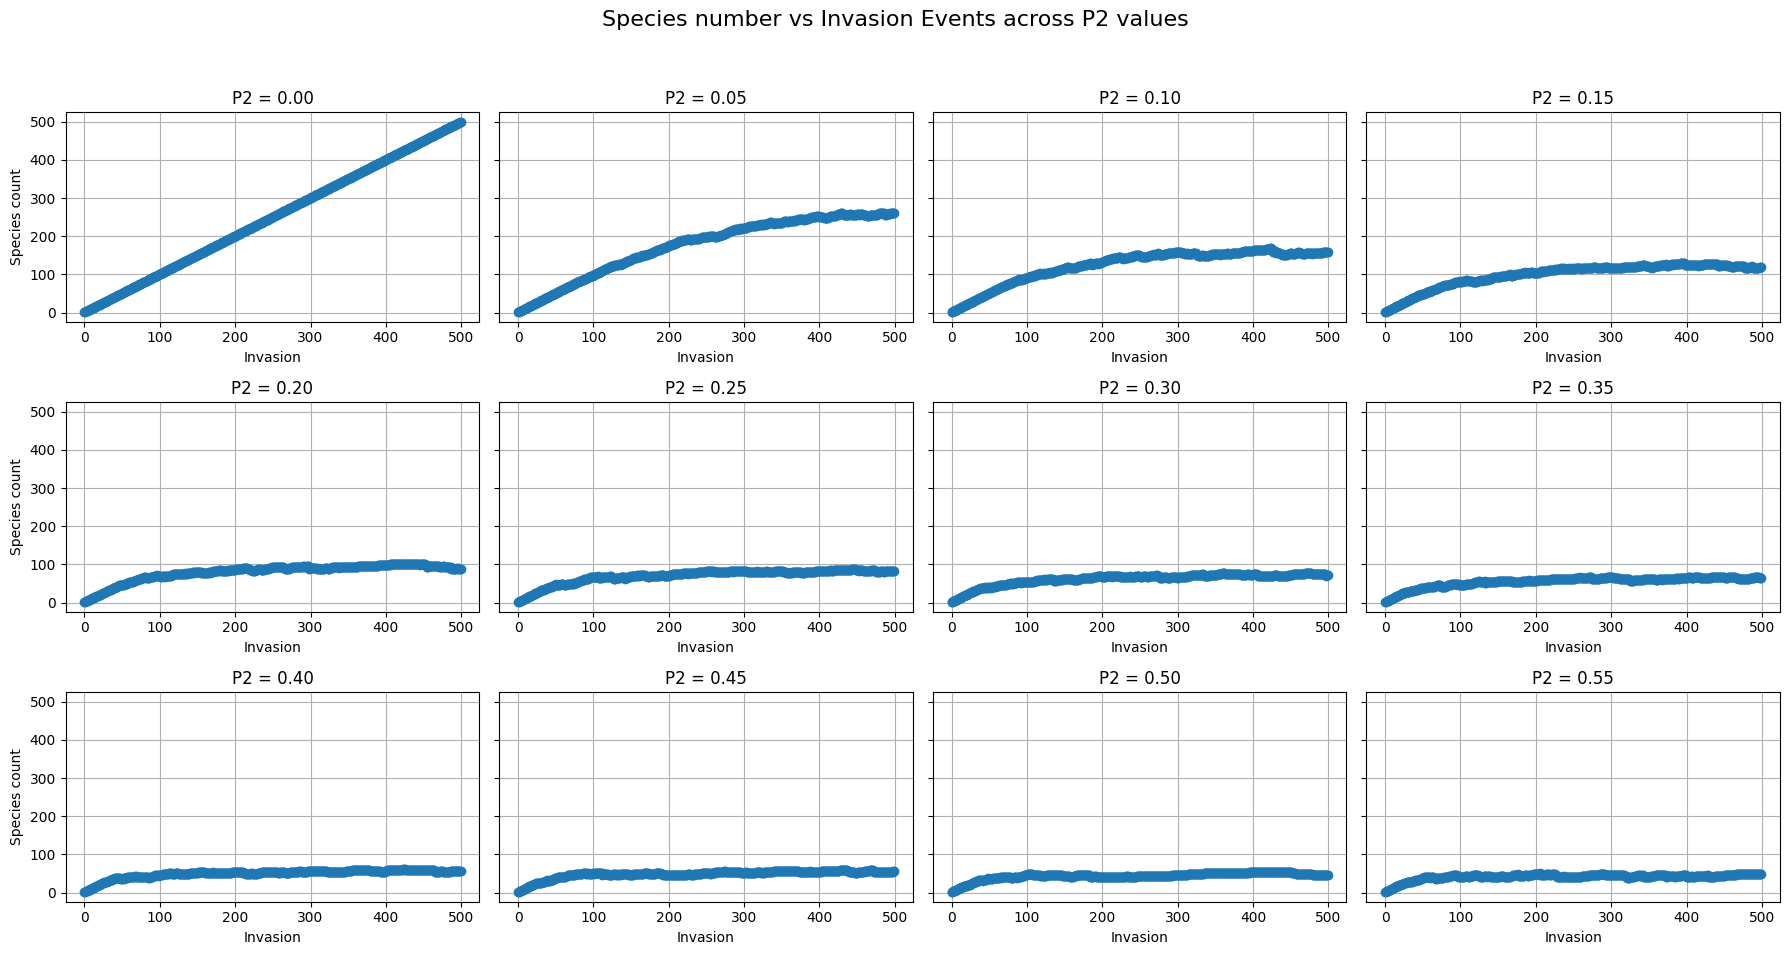

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define functions again after reset
def lotka_volterra_competition(B, t, G):
    interaction = G @ B
    dBdt = (1 - interaction) * B
    return dBdt

def generate_competition_matrix(G_old, S, P1, P2): 
    G_new = np.ones((S, S))
    G_new[:-1, :-1] = G_old
    Z = (np.random.rand(S) < P2) * P1
    Q = (np.random.rand(S) < P2) * P1
    for i in range(S - 1): 
        G_new[i, S - 1] = 0.75 * Z[i] + 0.25 * Q[i]
    for j in range(S):
        G_new[S - 1, j] = 0.75 * Q[j] + 0.25 * Z[j]
    np.fill_diagonal(G_new, 1.0)
    return G_new

# Optimized rerun with fewer P1 values and shorter simulation time
#P1_values = np.arange(0, 0.6, 0.05)  # Fewer steps
P1 = 0.2
P2_values = np.arange(0, 0.6, 0.05)
#P2 = 0.2
T = 1000
dt = 1.0
t = np.arange(0, T, dt)
threshold = 1e-2
max_steps = 500  # Fewer invasion events

# Set up subplots
ncols = 4
nrows = int(np.ceil(len(P2_values) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10), sharey=True)
axes = axes.flatten()

# Run simulation for each P1 value
for idx, P2 in enumerate(P2_values):
    S = 0
    G = np.zeros((0, 0))
    biomass_history = []
    species_counts = []

    for step in range(max_steps):
        S += 1
        G = generate_competition_matrix(G, S, P1, P2)

        if len(biomass_history) == 0:
            B0 = np.zeros(S)
            B0[-1] = 1e-3
        else:
            B0 = biomass_history[-1][-1]
            B0 = np.append(B0, 1e-3)

        try:
            sol = odeint(lotka_volterra_competition, B0, t, args=(G,), mxstep=5000)
        except RuntimeError:
            break

        final_B = sol[-1]
        keep_indices = final_B > threshold
        if np.sum(keep_indices) == 0:
            break

        G = G[keep_indices][:, keep_indices]
        sol = sol[:, keep_indices]
        biomass_history.append(sol)
        species_counts.append(len(final_B[keep_indices]))
        S = G.shape[0]

    species_counts_array = np.array(species_counts)
    ax = axes[idx]
    ax.plot(species_counts_array, marker='o')
    ax.set_title(f'P2 = {P2:.2f}')
    ax.set_xlabel('Invasion')
    if idx % ncols == 0:
        ax.set_ylabel('Species count')
    ax.grid(True)

# Hide unused subplots
for ax in axes[len(P2_values):]:
    ax.axis('off')

plt.suptitle("Species number vs Invasion Events across P2 values", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


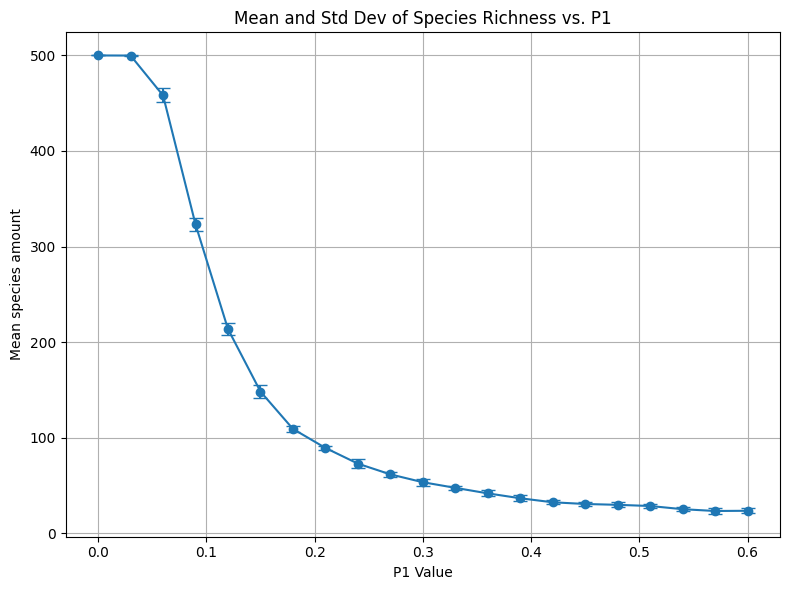

In [5]:
# Re-import libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define functions again after reset
def lotka_volterra_competition(B, t, G):
    interaction = G @ B
    dBdt = (1 - interaction) * B
    return dBdt

def generate_competition_matrix(G_old, S, P1, P2): 
    G_new = np.ones((S, S))
    G_new[:-1, :-1] = G_old
    Z = (np.random.rand(S) < P2) * P1
    Q = (np.random.rand(S) < P2) * P1
    for i in range(S - 1): 
        G_new[i, S - 1] = 0.75 * Z[i] + 0.25 * Q[i]
    for j in range(S):
        G_new[S - 1, j] = 0.75 * Q[j] + 0.25 * Z[j]
    np.fill_diagonal(G_new, 1.0)
    return G_new

# Set simulation parameters
P1_values = np.arange(0, 0.63, 0.03) #0.5, 0.05
P2 = 0.2
T = 1000
dt = 1.0
t = np.arange(0, T, dt)
threshold = 1e-2
max_steps = 500

# Prepare to collect mean and std
mean_species = []
std_species = []

# Run simulations and collect final species richness
for P1 in P1_values:
    final_counts = []
    for _ in range(9):  # Repeat 3 times for averaging
        S = 0
        G = np.zeros((0, 0))
        biomass_history = []
        species_counts = []

        for step in range(max_steps):
            S += 1
            G = generate_competition_matrix(G, S, P1, P2)

            if len(biomass_history) == 0:
                B0 = np.zeros(S)
                B0[-1] = 1e-3
            else:
                B0 = biomass_history[-1][-1]
                B0 = np.append(B0, 1e-3)

            try:
                sol = odeint(lotka_volterra_competition, B0, t, args=(G,), mxstep=3000)
            except RuntimeError:
                break

            final_B = sol[-1]
            keep_indices = final_B > threshold
            if np.sum(keep_indices) == 0:
                break

            G = G[keep_indices][:, keep_indices]
            sol = sol[:, keep_indices]
            biomass_history.append(sol)
            species_counts.append(len(final_B[keep_indices]))
            S = G.shape[0]

        if species_counts:
            final_counts.append(species_counts[-1])

    if final_counts:
        mean_species.append(np.mean(final_counts))
        std_species.append(np.std(final_counts))
    else:
        mean_species.append(0)
        std_species.append(0)

# Plot mean and std of final species counts
plt.figure(figsize=(8, 6))
plt.errorbar(P1_values, mean_species, yerr=std_species, fmt='-o', capsize=5)
plt.xlabel('P1 Value')
plt.ylabel('Mean species amount')
plt.title('Mean and Std Dev of Species Richness vs. P1')
plt.grid(True)
plt.tight_layout()
plt.show()


# changing P2

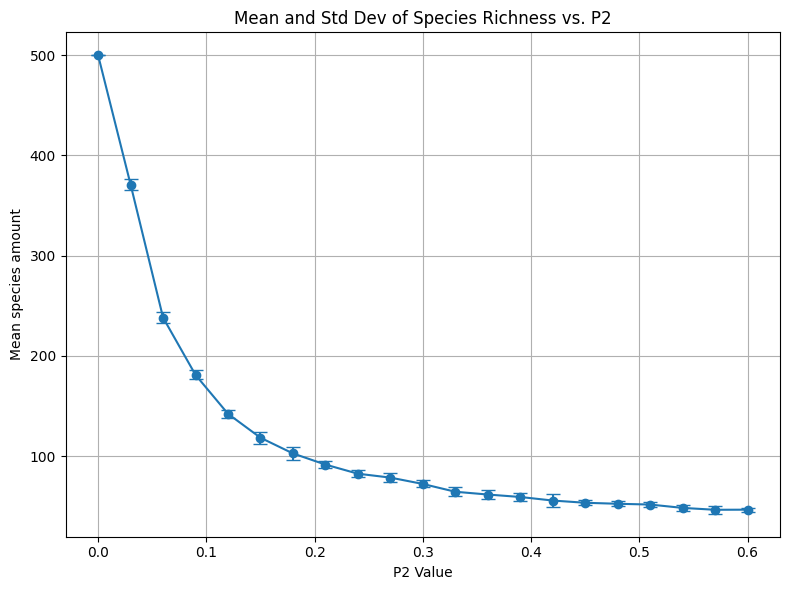

In [9]:
# Re-import libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define functions again after reset
def lotka_volterra_competition(B, t, G):
    interaction = G @ B
    dBdt = (1 - interaction) * B
    return dBdt

def generate_competition_matrix(G_old, S, P1, P2): 
    G_new = np.ones((S, S))
    G_new[:-1, :-1] = G_old
    Z = (np.random.rand(S) < P2) * P1
    Q = (np.random.rand(S) < P2) * P1
    for i in range(S - 1): 
        G_new[i, S - 1] = 0.75 * Z[i] + 0.25 * Q[i]
    for j in range(S):
        G_new[S - 1, j] = 0.75 * Q[j] + 0.25 * Z[j]
    np.fill_diagonal(G_new, 1.0)
    return G_new

# Set simulation parameters
#P1_values = np.arange(0, 0.63, 0.03) #0.5, 0.05
P2_values = np.arange(0, 0.63, 0.03) #0.5, 0.05
P1 = 0.2
T = 1000
dt = 1.0
t = np.arange(0, T, dt)
threshold = 1e-2
max_steps = 500

# Prepare to collect mean and std
mean_species = []
std_species = []

# Run simulations and collect final species richness
for P2 in P2_values:
    final_counts = []
    for _ in range(9):  # Repeat 3 times for averaging
        S = 0
        G = np.zeros((0, 0))
        biomass_history = []
        species_counts = []

        for step in range(max_steps):
            S += 1
            G = generate_competition_matrix(G, S, P1, P2)

            if len(biomass_history) == 0:
                B0 = np.zeros(S)
                B0[-1] = 1e-3
            else:
                B0 = biomass_history[-1][-1]
                B0 = np.append(B0, 1e-3)

            try:
                sol = odeint(lotka_volterra_competition, B0, t, args=(G,), mxstep=3000)
            except RuntimeError:
                break

            final_B = sol[-1]
            keep_indices = final_B > threshold
            if np.sum(keep_indices) == 0:
                break

            G = G[keep_indices][:, keep_indices]
            sol = sol[:, keep_indices]
            biomass_history.append(sol)
            species_counts.append(len(final_B[keep_indices]))
            S = G.shape[0]

        if species_counts:
            final_counts.append(species_counts[-1])

    if final_counts:
        mean_species.append(np.mean(final_counts))
        std_species.append(np.std(final_counts))
    else:
        mean_species.append(0)
        std_species.append(0)

# Plot mean and std of final species counts
plt.figure(figsize=(8, 6))
plt.errorbar(P1_values, mean_species, yerr=std_species, fmt='-o', capsize=5)
plt.xlabel('P2 Value')
plt.ylabel('Mean species amount')
plt.title('Mean and Std Dev of Species Richness vs. P2')
plt.grid(True)
plt.tight_layout()
plt.show()
